# Colab Intro and Nipy quickstart

In this notebook, we will have a look at Google Colab and do our first steps within the [Nipy](https://nipy.org) ecosystem.

*Note that the notebooks of this course were developed to be primarily used within Google Colab (ensuring equal computing environments for every student). You can also run the notebooks on your local machine, however, some commands - like ```apt-get``` - are Linux-specific and won't work on Windows or MacOS.*

## Setup directory structure

It's alway good to have a consistent [directory](https://andysbrainbook.readthedocs.io/en/latest/unix/Unix_01_Navigation.html) (or: folder) structure. This will help us to keep things organized and know where to look for files. In Colab, we can create new directories by using the [command line](https://en.wikipedia.org/wiki/Command-line_interface) (also called ["shell"](https://en.wikipedia.org/wiki/Shell_(computing)#Command-line_shells), "terminal" etc.). We can access the command line in a jupyter notebook by suffixing either ```!``` or ```%```.

Let's create a new directory for our data using the [Linux](https://tldp.org/LDP/intro-linux/html/chap_01.html) (or: [UNIX](https://tldp.org/LDP/intro-linux/html/sect_01_01.html#sect_01_01_01)) command ```mkdir```:


In [1]:
!mkdir /data

Check Colab's file browser whether a new directory has been created.


As you will see throughout the course, we can make use of different Linux commands within Colab (for exampling for copying or compressing data). In fact, Colab runs on [Ubuntu](https://en.wikipedia.org/wiki/Ubuntu) - a GNU/Linux distribution. Thus, it makes sense to get used to the [Linux file system](https://tldp.org/LDP/intro-linux/html/sect_03_01.html) as well as to [running commands from a Unix-style shell](https://linuxjourney.com/lesson/the-shell).

Now, let's install some [packages](https://docs.python.org/3/tutorial/modules.html#packages) (by using ```pip``` via the command line) and download a test dataset (via ```gdown``` which is already installed in Colab)

In [2]:
# install nilearn
!pip install nilearn

# download dataset
!gdown 1jREp9F13CGM1XF20qczKreUPdGoJP_76
!unzip /content/ds000114.zip -d /data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 103.2 MB/s eta 0:00:00
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jREp9F13CGM1XF20qczKreUPdGoJP_76
To: /content/ds000114.zip
100% 95.9M/95.9M [00:01<00:00, 61.2MB/s]
Archive:  /content/ds000114.zip
   creating: /data/ds000114/
  inflating: /data/ds000114/dataset_description.json  
   creating: /data/ds000114/subjects/
  inflating: /data/ds000114/task-covertverbgeneration_bold.json  
  inflating: /data/ds000114/participants.tsv  
   creating: /data/ds000114/subjects/sub-01/
   creating: /data/ds000114/subjects/sub-02/
   creating: /data/ds000114/subjects/sub-03/
   creating: /data/ds000114/subjects/sub-01/ses-test/
   creating: /data/ds000114/subjects/sub-02/ses-test/
   creating: /data/ds000114/subjects/sub

Great! Now everything should be set up to make our first steps in neuroimaging analyis in Python!

## Visualization with Nilearn

Nilearn is a python module used for statisical learning on neuroimaging data. In addition to various statistical and machine-learning tools, it also allows for easy visualizing MRI data. Let's have a look!

First of, we have to import the necessary libraries:




In [3]:
%matplotlib inline
from nilearn import plotting, datasets, image
import numpy as np

("%matplotlib inline" is a command only available for the Jupyter Notebook and the Jupyter QTConsole. It allows the output of plotting commands to be displayed inline with the notebook, directly below the code cell that produced it.)





Now that we have imported the neccessary packages, we have to tell Python where to look for the data. In this notebook, we will use a snippet of an [Openneuro dataset](https://openneuro.org/datasets/ds000114/versions/1.0.1). If you have already run the first cell, the data should be located unter ```/data``` (you can have a look at the file browser on the left panel of google colab). As a next step, let's define a variable that points to the exact location of the subjects data

In [4]:
subjects_dir = "/data/ds000114/subjects/"

As you can see in the filebrowser, the data in organized in a certain structure. For example, for each subject there are two folders, ```anat``` and ```func``` - these are the locations of the anatomical and functional images, respectively. This corresponds to the [Brain Imaging Data Structure (BIDS)](https://bids.neuroimaging.io/) specification, a standard for organizing, annotating, and describing data collected during neuroimaging experiments. But more on that later.

Let's have a quick look at the anatomical image. For that, we will use Nilearn's plotting module. Also, we will make use of a powerful string formatting mechanism: The [f-string](https://docs.python.org/3/reference/lexical_analysis.html#f-strings) (Note: f-strings require >Python 3.6)

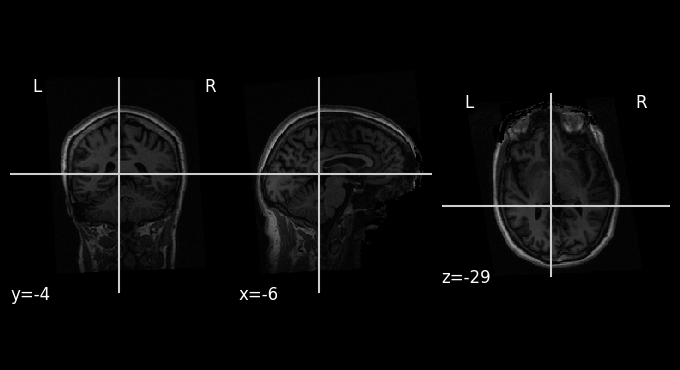

In [5]:
subject = "sub-01"
anat_img = f"{subjects_dir}{subject}/ses-test/anat/{subject}_ses-test_T1w.nii.gz"

plotting.plot_anat(anat_img)

Great! As you've seen, plotting with nilearn is straightforward. But we can also modify the view by passing some parameters to the Nilearn function, e.g., the desired display mode or cut-coordinates. As for every Nilearn function, a full description of possible parameters can be found in the [documentation](https://nilearn.github.io/stable/modules/generated/nilearn.plotting.plot_anat.html) or directly in Colab by either using ```?``` or ```help()```.


In [6]:
help(plotting.plot_anat)

Help on function plot_anat in module nilearn.plotting.img_plotting:

plot_anat(anat_img=<MNI152Template>, cut_coords=None, output_file=None, display_mode='ortho', figure=None, axes=None, title=None, annotate=True, threshold=None, draw_cross=True, black_bg='auto', dim='auto', cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7e1d26b1bfa0>, colorbar=False, cbar_tick_format='%.2g', radiological=False, vmin=None, vmax=None, **kwargs)
    Plot cuts of an anatomical image.
    
    By default 3 cuts: Frontal, Axial, and Lateral.
    
    Parameters
    ----------
    anat_img : Niimg-like object, optional
        See :ref:`extracting_data`.
        The anatomical image to be used as a background. If None is
        given, nilearn tries to find a T1 template.
        Default=MNI152TEMPLATE.
    
    cut_coords : None, a :obj:`tuple` of :obj:`float`, or :obj:`int`, optional
        The MNI coordinates of the point where the cut is performed.
    
            - If `display_mode` is `'


Let's tell Nilearn to plot 6 slices of the subjects anatomical image in axial direction

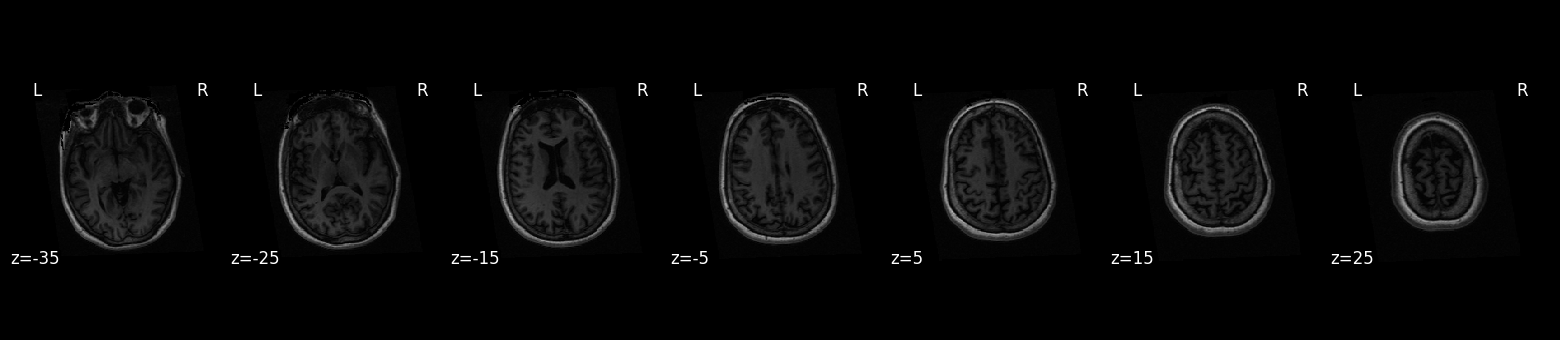

In [7]:
plotting.plot_anat(anat_img,
                   display_mode="z",
                   cut_coords=range(-35,35,10))

Thanks to the BIDS specification, we can easily loop over the images of multiple subjects and get a quick look at each subject's brain.

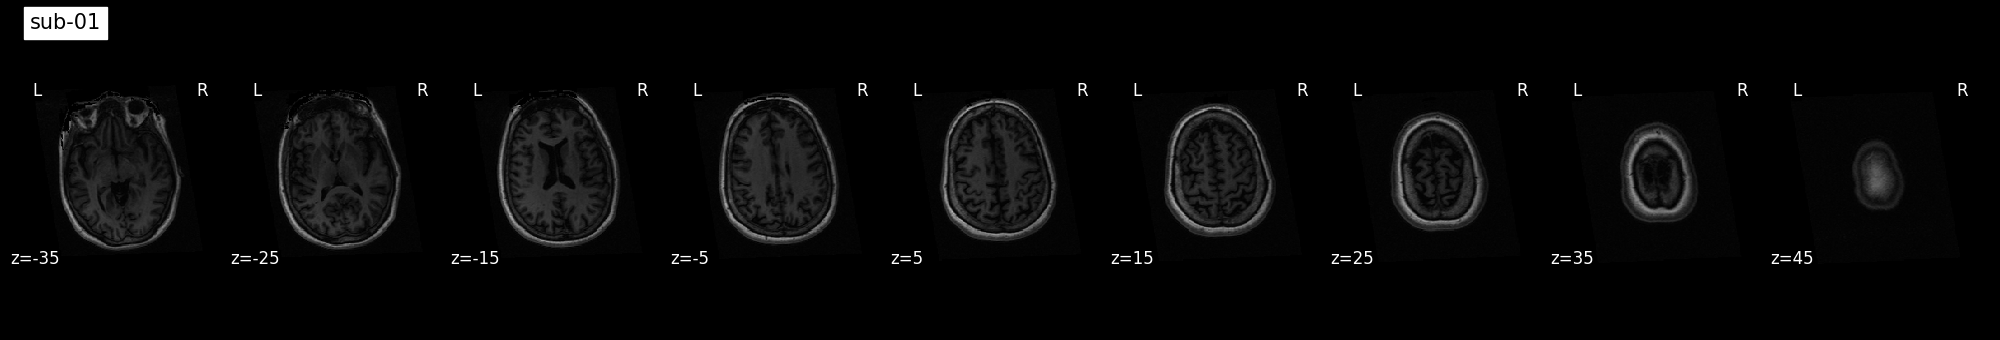

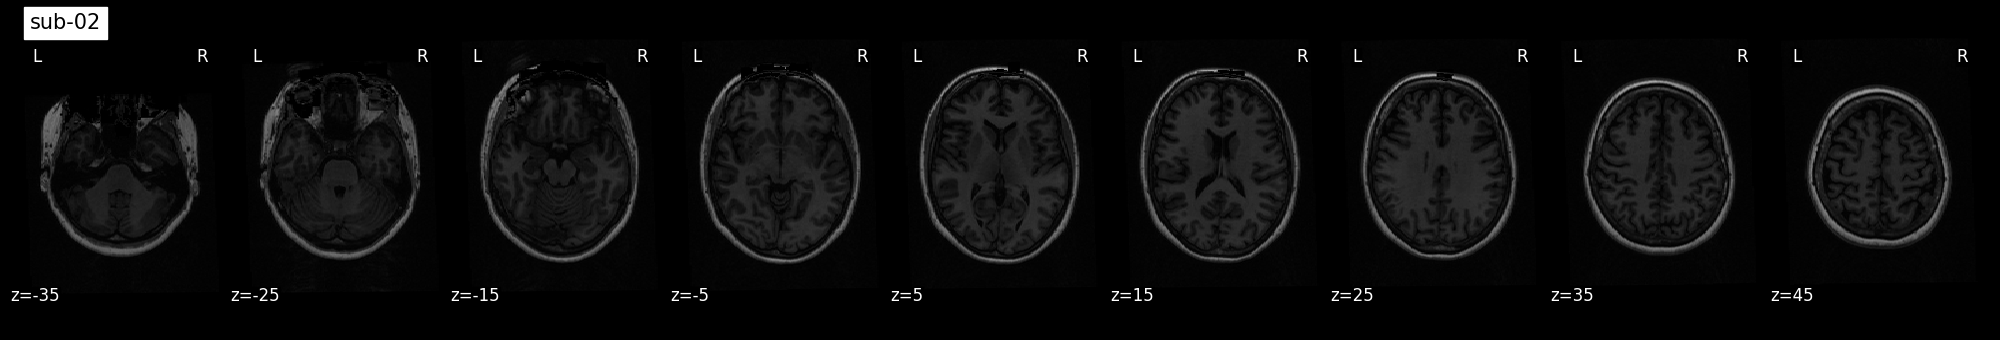

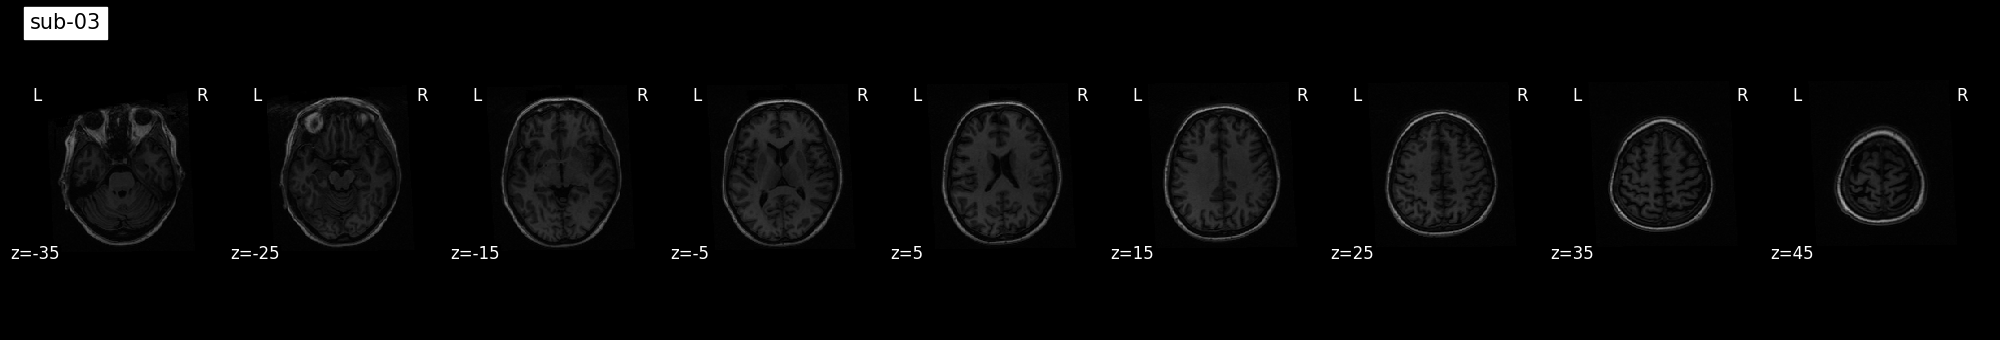

In [8]:
subject_list = ["sub-01", "sub-02", "sub-03"]

for subject in subject_list:

  anat_img = f"{subjects_dir}{subject}/ses-test/anat/{subject}_ses-test_T1w.nii.gz"
  plotting.plot_anat(anat_img,
                     display_mode="z",
                     cut_coords=range(-35,50,10),
                     title=subject)

There you go! As one can clearly, the brains of the subjects differ quite a bit. Likewise, these raw images are also not yet in a standard space. That is one reason why we need to perform some preprocessing of the data before we can get started with the actual analysis.

## Exercise

Try to plot the functional image stored in the ```~/func``` directory.

Tip: Use the Nilearn function ```mean_img``` from the ```image``` module we imported earlier. Use the path to the functional image as the only parameter to get the mean functional image. This is neccessary as a 3D image needs to be provided (more on that in the next session).

### Bonus exercise

Refactor the code you have written above to a function that takes a file path to a functional image, calculates its mean image and then plots the result. Once you have created the function, create a loop and run the function for every participant.

Tip: The function signature could look like this:


```
plot_mean_img(func_path, title)
```



## Resources

[Google Colab Intro](https://colab.research.google.com/notebooks/intro.ipynb): Short Google intro showcasing Colab functionality

[Colab Cheatsheet](https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Cheat_sheet_for_Google_Colab.ipynb): Showcase of some functions in Google Colab

[UNIX for Neuroimagers](https://andysbrainbook.readthedocs.io/en/latest/unix/Unix_Intro.html): Several useful Unix tutorials created by neuroscientist Andrew Jahn

[Unix/Linux commands cheatsheet](https://upload.wikimedia.org/wikipedia/commons/7/79/Unix_command_cheatsheet.pdf): Overview of different Unix-like shell commands and common procedures

[Command Line tutorial](https://linuxjourney.com/lesson/the-shell): Tutorial on important shell commands

[Filesystem Tutorial](https://linuxjourney.com/lesson/filesystem-hierarchy): Tutorial on the Linux filesystem

[The Good Research Code Handbook](https://goodresearch.dev/index.html): Handbook focussing on good programming practice for research

[Nilearn Documentation](https://nilearn.github.io/stable/index.html): Offical Nilearn documentation. Hear you can find different examples and user guides as well as details to all Nilearn modules

[Neurostars](https://neurostars.org): Q/A forum for neuroscience research